<a href="https://colab.research.google.com/github/hbhb0311/Study/blob/main/Pytorch/PART_1-%20BasicML/MNISTIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch

In [5]:
# parameters
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root = 'dataset/', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = 'dataset/', train = False, transform = transforms.ToTensor(), download = True)
data_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

# Softmax

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda")   

In [26]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True)

# initialization
torch.nn.init.normal_(linear.weight)

# parameters
training_epochs = 15
batch_size = 100

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)
        # [batch_size, 1, 28, 28] = reshape => [batch_size, 784]
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        avg_cost += cost / total_batch
        
    print('Epoch: ', '%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))           

Epoch:  0001 cost =  12.869394302
Epoch:  0002 cost =  12.869405746
Epoch:  0003 cost =  12.869401932
Epoch:  0004 cost =  12.869398117
Epoch:  0005 cost =  12.869394302
Epoch:  0006 cost =  12.869397163
Epoch:  0007 cost =  12.869400978
Epoch:  0008 cost =  12.869397163
Epoch:  0009 cost =  12.869400978
Epoch:  0010 cost =  12.869400978
Epoch:  0011 cost =  12.869392395
Epoch:  0012 cost =  12.869396210
Epoch:  0013 cost =  12.869397163
Epoch:  0014 cost =  12.869408607
Epoch:  0015 cost =  12.869402885


# Test

In [27]:
# grad 사용하지 않음
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

Accuracy :  0.094200000166893


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Visualization

In [28]:
import matplotlib.pyplot as plt
import random

Label:  1
Prediction:  2


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


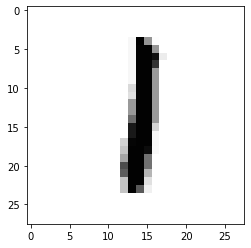

In [29]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r: r+1].view(-1, 28 * 28).float()
Y_single_data = mnist_test.test_labels[r: r+1]

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r: r+1].view(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()